In [ ]:
import torch
from peft import PeftModel

from src.controller import Controller
from src.sd3 import SD3ControllerPipeline

In [2]:
pipe = SD3ControllerPipeline.from_pretrained(
    "stabilityai/stable-diffusion-3.5-medium", 
    torch_dtype=torch.float16
)
pipe.enable_sequential_cpu_offload()

# Disable gradients for all parameters
pipe.transformer.requires_grad_(False)
pipe.vae.requires_grad_(False)
pipe.text_encoder.requires_grad_(False)
pipe.text_encoder_2.requires_grad_(False)
pipe.text_encoder_3.requires_grad_(False)
print("Model loaded")

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Model loaded


  0%|          | 0/28 [00:00<?, ?it/s]

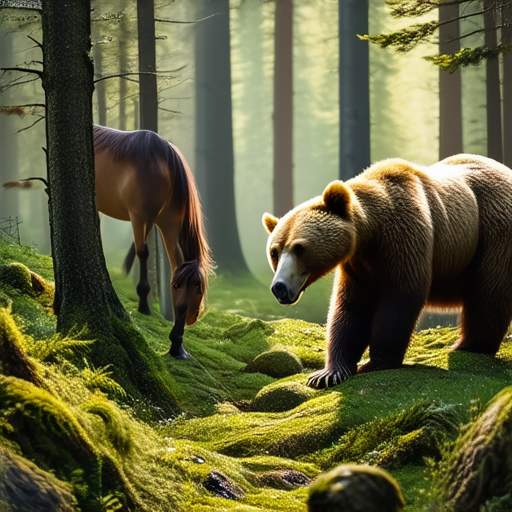

In [3]:
SEED = 1
SIZE = 512
STEPS = 28
GUIDANCE = 4.5
PROMPT = "A horse and a bear in a forest"

controller = Controller(
    t5_ids = [[1], [5]], # <- Put the T5 tokens ids here, where each subgroup defines a subject group
    clip_ids = [[2], [5]], # <- Put the CLIP token ids here, where each subgroup defines a subject group
    lambda_scale=10,
    heuristic="divide_and_bind", # "jedi", "conform", "focus", "attend_and_excite", "divide_and_bind"
    model="SD3",
)

output_controller = pipe(
    PROMPT,
    num_inference_steps=STEPS,
    guidance_scale=GUIDANCE,
    height=SIZE,
    width=SIZE,
    max_sequence_length=77,
    generator=torch.Generator("cuda").manual_seed(SEED),
    controller=controller,
).images[0]

output_controller

  0%|          | 0/28 [00:00<?, ?it/s]

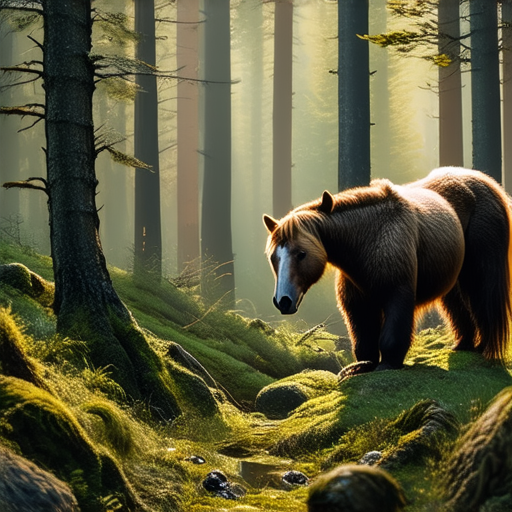

In [4]:
output_base = pipe(
    PROMPT,
    num_inference_steps=STEPS,
    guidance_scale=GUIDANCE,
    height=SIZE,
    width=SIZE,
    max_sequence_length=77,
    generator=torch.Generator("cuda").manual_seed(SEED),
    controller=None,
).images[0]

output_base